# Diving into Data Science

## EDA

Import data into pandas

Data is from a bike-sharing services from Capital BikeShare

In [8]:
import pandas as pd
hour = pd.read_csv('hour.csv')
print(hour.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  


This data set is to understand bike rides for a random company to practice with manipulating data and getting insight

Calculating Summary Statistics

In [4]:
print(hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

This is to show a brief understand of this big data set. This will give me more insight into it. 

## Analyzing Subsets of Data

Nighttime Data

In [5]:
#this is practice using .loc()
print(hour.loc[3,'count'])

13


In [6]:
#Want to find out 2 through 4 within registered
print(hour.loc[2:4,'registered'])

2    27
3    10
4     1
Name: registered, dtype: int64


In [7]:
print(hour.loc[hour['hr']<5,'registered'].mean())

20.7881427367238


In [8]:
print(hour.loc[(hour['hr']<5) & (hour['temp']<0.50),'count'].mean)
print(hour.loc[(hour['hr']<5) & (hour['temp']>0.50),'count'].mean)

<bound method Series.mean of 0        16
1        40
2        32
3        13
4         1
         ..
17355    34
17356    19
17357    11
17358     1
17359     3
Name: count, Length: 1919, dtype: int64>
<bound method Series.mean of 1759      76
1760      51
1761      25
1762       8
1763       3
        ... 
15814     13
15815      5
15859    117
16206     23
16734     11
Name: count, Length: 1536, dtype: int64>


In [9]:
print(hour.loc[(hour['temp']>0.50) | hour['hum']>0.50,'count'].mean())

189.66733882583395


Seasonal Data

    1 for winter
    2 for spring
    3 for summer
    4 for fall

In [10]:
print(hour.groupby(['season'])['count'].mean())

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


This shows that there are more counts for summer than for winter. This shows that more people registar for a bike in the summer time than the winter. 

In [11]:
print(hour.groupby(['season','holiday'])['count'].mean())

season  holiday
1       0          112.685875
        1           72.042683
2       0          208.428472
        1          204.552083
3       0          235.976818
        1          237.822917
4       0          199.965998
        1          167.722222
Name: count, dtype: float64


This breaks it down by holidays where 0 means no holidays and 1 means holiday. We can go into deeper into summer counts and for holiday or non-holiday it is about the same. However, for winter there are less ride sharing during holidays. 

## Visualizing Data with MatplotLib

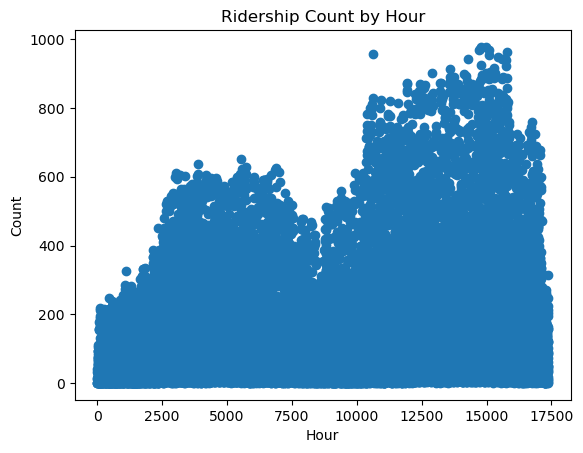

In [16]:
#library needed to visualize
import matplotlib.pyplot as plt

#making the plot
plt.scatter(x = hour['instant'],y = hour['count'])

#labeling axis' and title the plot
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")

#to show the plot
plt.show()

### Plotting subsets of Data

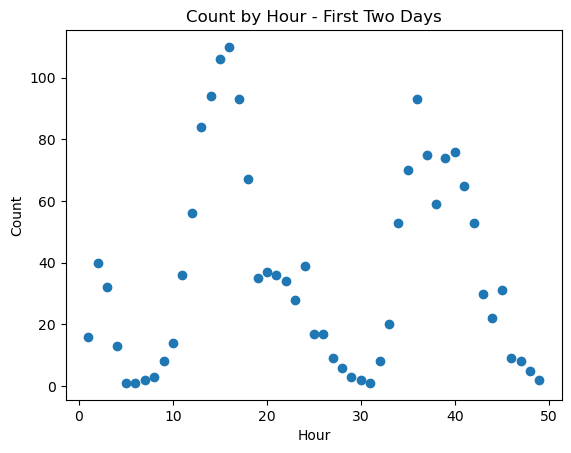

In [17]:
#Subset the data for the first 48hours
hour_first48 = hour.loc[0:48,:]

#plotted the subset data
plt.scatter(x = hour_first48['instant'], y = hour_first48['count'])

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")

plt.show()

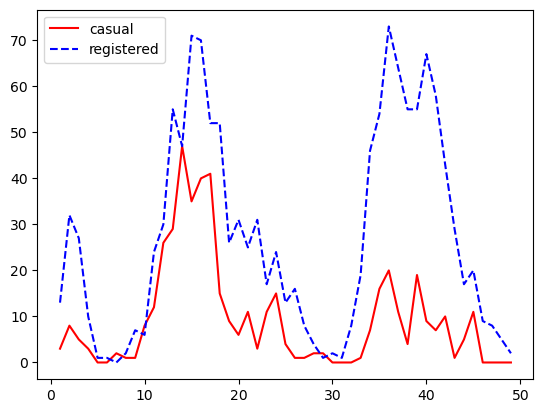

In [18]:
#Going to play around other charts to get more insights
plt.plot(hour_first48['instant'], hour_first48['casual'],c='red',label='casual',linestyle='-')
plt.plot(hour_first48['instant'],\
         hour_first48['registered'],c='blue',label='registered',linestyle='--')
plt.legend()

plt.show()

In [19]:
#using seaborn as a visualization package
import seaborn as sns

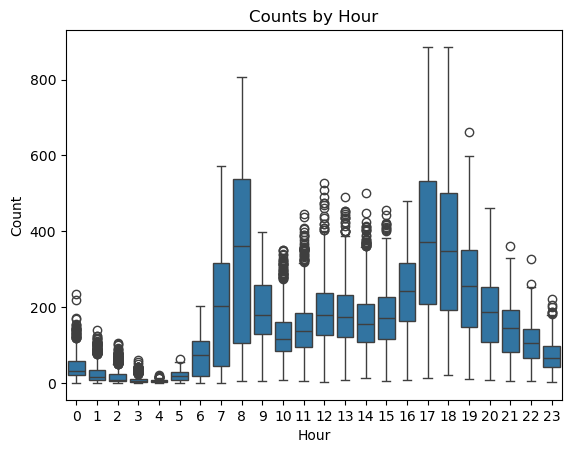

In [20]:
sns.boxplot(x='hr', y='registered',data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

This shows the variance of the data and show where the outliers are at. This shows more important information of the data set for hours. 

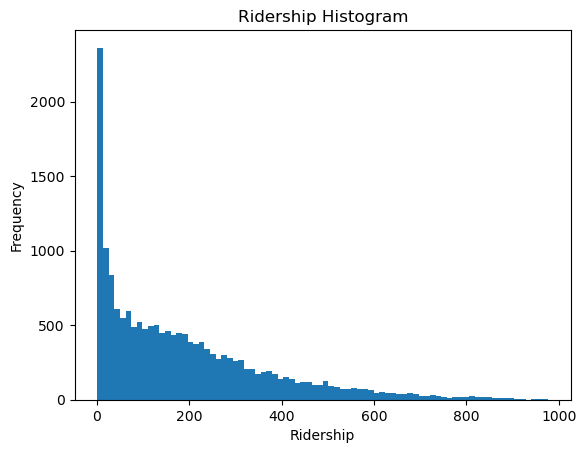

In [21]:
plt.hist(hour['count'],bins=80)

plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")

plt.show()

As you can see this data is skewed to the left. This shows that 1 Ridership has the highest frequency. 

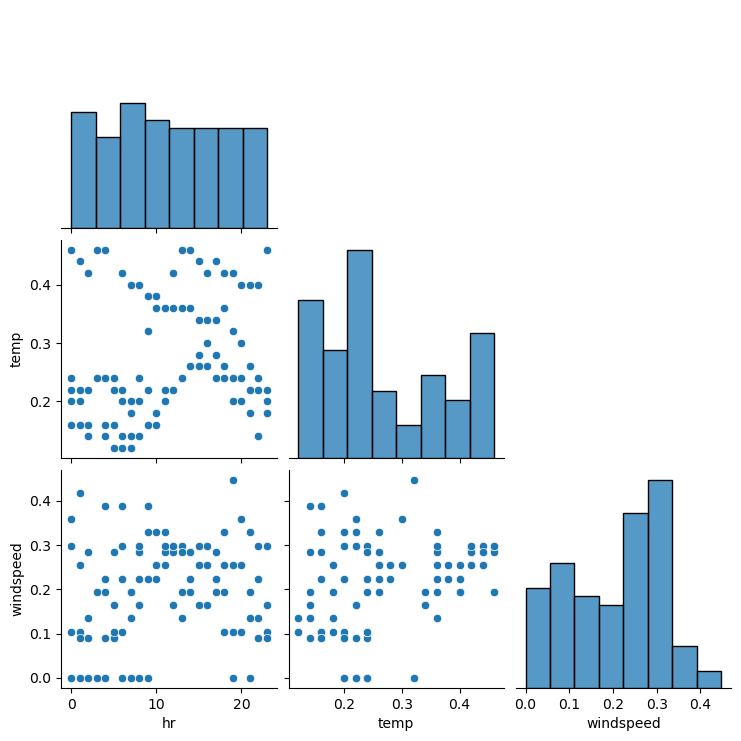

In [22]:
thevariables=['hr','temp','windspeed']
hour_first100 = hour.loc[0:100,thevariables]
sns.pairplot(hour_first100,corner=True)
plt.show()

## Exploring Correlation